In [ ]:
!python -m pip install pyyaml==6.0
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'detectron2' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
torch:  1.13 ; cuda:  cu116
detectron2: 0.6


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from detectron2.utils.logger import setup_logger
# from detectron2.utils.visualizer import Visualizer

setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

from os import path
if __name__ == '__main__':

    # Register coco data set
    json_file_path = "/content/drive/MyDrive/빅데이터 분석 22.08.29./조별 프로젝트/22.11.09 3차 미니 프로젝트/kim/data/train/trainval.json" # 여기 json 파일 경로 입력
    # 여기 사진 데이터 폴더 경로 입력력
    dataset_dir = "/content/drive/MyDrive/빅데이터 분석 22.08.29./조별 프로젝트/22.11.09 3차 미니 프로젝트/kim/data/train"
    register_coco_instances("car_dataset1", {}, json_file_path, dataset_dir)

    from detectron2.engine import DefaultTrainer
    from detectron2 import model_zoo
    from detectron2.config import get_cfg
    cfg = get_cfg()

    # without cuda
    #cfg.MODEL.DEVICE = "cpu"

    cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
    # cfg.merge_from_file(model_zoo.get_config_file("'/content/drive/MyDrive/R-50.pkl'"))
    cfg.DATASETS.TRAIN = ("car_dataset1",)
    cfg.DATASETS.TEST = ()

    # local_model_weights_path = ""
    # os.makedirs(local_model_weights_path.parent, exist_ok=True)
    # cfg.MODEL.WEIGHTS = str(local_model_weights_path)
    cfg.MODEL.WEIGHTS = '/content/drive/MyDrive/빅데이터 분석 22.08.29./조별 프로젝트/22.11.09 3차 미니 프로젝트/kim/data/R-50.pkl'
    # cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
    cfg.SOLVER.MAX_ITER = 500    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
    cfg.SOLVER.STEPS = []        # do not decay learning rate
    # cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
    # cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
    # NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

    # os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume=False)
    trainer.train()

[12/21 08:38:46 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
frame86.png


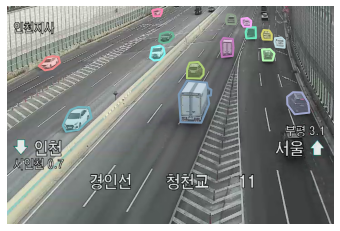

frame31.png


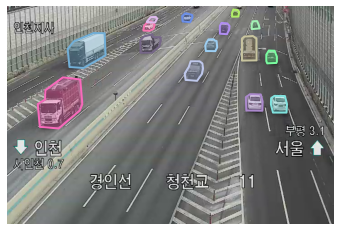

frame115.png


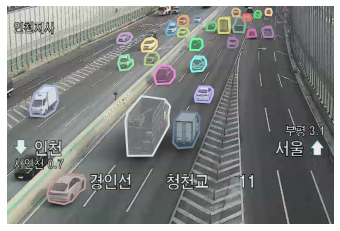

frame60.png


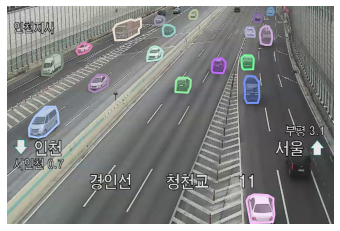

frame90.png


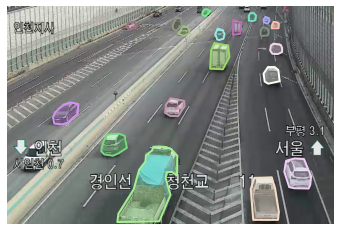

In [ ]:
from pycocotools.coco import COCO
from skimage import io
from matplotlib import pyplot as plt

# coco data visualization of segmentation mask
coco = COCO(json_file_path)
catIds = coco.getCatIds(catNms=['*'])
imgIds = coco.getImgIds(catIds=catIds)

# 5장의 이미지를 랜덤하게 가져와서 확인하는 부분
for d in random.sample(imgIds, 5):
    img = coco.loadImgs(imgIds[d])[0]
    file_name = io.imread(dataset_dir +'/'+ img['file_name'])
    plt.axis('off')
    plt.imshow(file_name) #Draw the image and show it to plt.show()
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)
    print(img['file_name'])
    plt.show()

In [ ]:
%run detectron2/demo/demo.py --config-file detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml \
--video-input '/content/drive/MyDrive/빅데이터 분석 22.08.29./조별 프로젝트/22.11.09 3차 미니 프로젝트/kim/data/cctv_mp4.mp4' --confidence-threshold 0.6 --output video-output1.mkv \
--opts MODEL.WEIGHTS detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl

[12/21 09:01:30 detectron2]: Arguments: Namespace(confidence_threshold=0.6, config_file='detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl'], output='video-output1.mkv', video_input='/content/drive/MyDrive/빅데이터 분석 22.08.29./조별 프로젝트/22.11.09 3차 미니 프로젝트/kim/data/cctv_mp4.mp4', webcam=False)
[12/21 09:01:31 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[12/21 09:01:31 fvcore.common.checkpoint]: [Checkpointer] Loading from /root/.torch/iopath_cache/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[12/21 09:01:31 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'


100%|██████████| 871/871 [02:51<00:00,  5.08it/s]


In [ ]:
# Download the results
from google.colab import files
files.download('video-output.mkv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>